<a href="https://colab.research.google.com/github/Isafon/ECE528/blob/main/ECE_ASN4_Q2_univariate_time_series_multi_step.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
import sklearn
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import keras
from keras import layers

import numpy as np
from numpy import load

# to make this notebook's output stable across runs
np.random.seed(42)
keras.utils.set_random_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### Load Dataset

In [2]:
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 20, 0, 0.05])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

In [3]:
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bx", markersize=10)
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "ro")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])

In [4]:
def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plot_series(X[0, :, 0])
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "ro-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :, 0], "bx-", label="Forecast", markersize=10)
    plt.axis([0, n_steps + ahead, -1, 1])
    plt.legend(fontsize=14)

## Forecasting Several Steps Ahead

If we want to predict the next 10 values, instead of just 1, we can modify our previous model to predict the next 10 values. We first need to load the dataset that has sequences with 9 more time steps.

In [5]:
n_steps = 60
series = load('univariate-time-series-multi-step.npy')

X_train, y_train = series[:9000, :n_steps], series[:9000, -1] # -1 references the last column
X_valid, y_valid = series[9000:11000, :n_steps], series[9000:11000, -1]
X_test, y_test = series[11000:, :n_steps], series[11000:, -1]

In [6]:
#Improve upon this model with your own model

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[60, 1]),
    keras.layers.Dense(10)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1879 - val_loss: 0.0726
Epoch 2/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0668 - val_loss: 0.0604
Epoch 3/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0572 - val_loss: 0.0566
Epoch 4/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0541 - val_loss: 0.0544
Epoch 5/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0522 - val_loss: 0.0529
Epoch 6/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0510 - val_loss: 0.0518
Epoch 7/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0501 - val_loss: 0.0510
Epoch 8/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0494 - val_loss: 0.0504
Epoch 9/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0489 - val_loss: 0.0500
Epoch 10/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0484 - val_loss: 0.0497
Epoch 11/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0481 - val_loss: 0.0494
Epoch 12/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

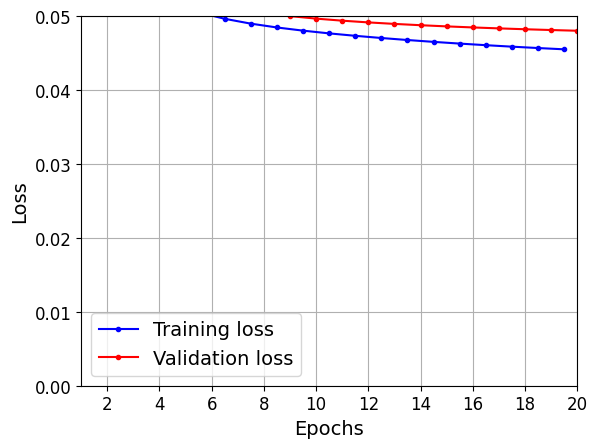

In [7]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

Now let's predict the next 10 values:

In [8]:
series = load('univariate-time-series-multi-step-test.npy')
X_new, Y_new = series[:, :60, :], series[:, -10:, :]
Y_pred = model.predict(X_new)[..., np.newaxis]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


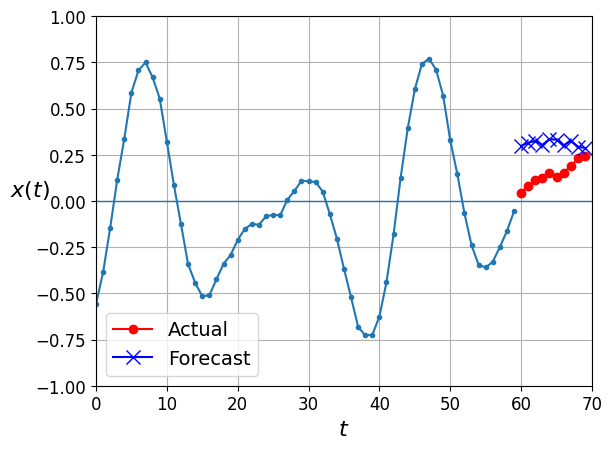

In [9]:
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

In [10]:
model.evaluate(X_test, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0467


0.045788224786520004

## Isa's Code Starts Here

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import math, os, gc, random

# Reproducibility
seed = 42
tf.keras.utils.set_random_seed(seed)
np.random.seed(seed)
random.seed(seed)

BATCH = 128
PREFETCH = tf.data.AUTOTUNE

def ensure_ds():
    """Return (train_ds, valid_ds, test_ds) yielding (batch, 60, 1) -> (batch, 10)."""
    global train_ds, valid_ds, test_ds
    if "train_ds" in globals() and "valid_ds" in globals() and "test_ds" in globals():
        return train_ds, valid_ds, test_ds

    # Fallback: build datasets from arrays present in the handout
    assert all(k in globals() for k in ["X_train","y_train","X_valid","y_valid","X_test","y_test"]), \
        "Expected either tf.data datasets (train_ds/valid_ds/test_ds) or arrays (X_*/y_*)."

    def make_ds(X, y, training=False):
        ds = tf.data.Dataset.from_tensor_slices((X.astype(np.float32), y.astype(np.float32)))
        if training:
            ds = ds.shuffle(min(len(X), 10000), seed=seed, reshuffle_each_iteration=True)
        ds = ds.batch(BATCH).prefetch(PREFETCH)
        return ds

    return make_ds(X_train, y_train, training=True), \
           make_ds(X_valid, y_valid, training=False), \
           make_ds(X_test,  y_test,  training=False)

train_ds, valid_ds, test_ds = ensure_ds()

# Optional: small normalization learnt from train inputs (helps stability)
norm = layers.Normalization(axis=-1)
# adapt using a subset to save RAM if needed
for xb, _ in train_ds.take(20):
    norm.adapt(xb)  # calling adapt multiple times is cumulative-safe

# --- Model: light Conv stem -> (Bi)LSTM stack -> Dense(10) head ---
def build_model():
    inp = layers.Input(shape=(60, 1))
    x = norm(inp)

    # A tiny conv stem often helps multi-step stability
    x = layers.Conv1D(64, 3, padding="causal", activation="relu")(x)
    x = layers.Conv1D(64, 3, padding="causal", activation="relu")(x)

    # Recurrent layers
    x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
    x = layers.Dropout(0.2)(x)
    x = layers.LSTM(64)(x)

    # Projection to 10-step horizon
    x = layers.Dense(128, activation="relu")(x)
    out = layers.Dense(10, name="horizon")(x)

    model = keras.Model(inp, out, name="rnn_multistep")
    model.compile(
        optimizer=keras.optimizers.Adam(1e-3),
        loss="mse",
        metrics=["mse"],
    )
    return model

model = build_model()
model.summary()

# --- Callbacks for stable convergence ---
cbs = [
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_mse", factor=0.5, patience=4, min_lr=1e-6, verbose=1
    ),
    keras.callbacks.EarlyStopping(
        monitor="val_mse", patience=12, restore_best_weights=True, verbose=1
    ),
]

# --- Train ---
history = model.fit(
    train_ds,
    validation_data=valid_ds,
    epochs=200,
    callbacks=cbs,
    verbose=2,
)


test_loss, test_mse = model.evaluate(test_ds, verbose=0)
print(f"\nQ2 — RNN multi-step test MSE: {test_mse:.6f}")
print("Baseline (linear) MSE from handout: 0.0458")

for xb, yb in test_ds.take(1):
    preds = model.predict(xb[:4], verbose=0)  # 4 examples
    print("\nSample target[0]:", np.round(yb[0].numpy(), 3))
    print("Sample pred  [0]:", np.round(preds[0], 3))

gc.collect()

Model: "rnn_multistep"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ normalization (Normalization)   │ (None, 60, 1)          │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 60, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 60, 64)         │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 60, 128)        │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ horizon (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 137,677 (537.80 KB)

 Trainable params: 137,674 (537.79 KB)

 Non-trainable params: 3 (16.00 B)

Epoch 1/200
71/71 - 9s - 127ms/step - loss: 0.0950 - mse: 0.0950 - val_loss: 0.0750 - val_mse: 0.0750 - learning_rate: 1.0000e-03
Epoch 2/200
71/71 - 1s - 14ms/step - loss: 0.0625 - mse: 0.0625 - val_loss: 0.0641 - val_mse: 0.0641 - learning_rate: 1.0000e-03
Epoch 3/200
71/71 - 1s - 15ms/step - loss: 0.0532 - mse: 0.0532 - val_loss: 0.0504 - val_mse: 0.0504 - learning_rate: 1.0000e-03
Epoch 4/200
71/71 - 1s - 15ms/step - loss: 0.0443 - mse: 0.0443 - val_loss: 0.0362 - val_mse: 0.0362 - learning_rate: 1.0000e-03
Epoch 5/200
71/71 - 1s - 15ms/step - loss: 0.0361 - mse: 0.0361 - val_loss: 0.0345 - val_mse: 0.0345 - learning_rate: 1.0000e-03
Epoch 6/200
71/71 - 1s - 14ms/step - loss: 0.0320 - mse: 0.0320 - val_loss: 0.0314 - val_mse: 0.0314 - learning_rate: 1.0000e-03
Epoch 7/200
71/71 - 1s - 18ms/step - loss: 0.0306 - mse: 0.0306 - val_loss: 0.0309 - val_mse: 0.0309 - learning_rate: 1.0000e-03
Epoch 8/200
71/71 - 1s - 20ms/step - loss: 0.0307 - mse: 0.0307 - val_loss: 0.0314 - val_mse: 0.

8248